In [122]:
# import the required packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from wordcloud import WordCloud
from scipy.stats import chi2
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [86]:
dat = pd.read_csv('bbc-text.csv')

In [87]:
dat.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [88]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [89]:
dat['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [90]:
dat['text'].value_counts()

blind student  hears in colour  a blind student has developed software that turns colours into musical notes so that he can read weather maps.  victor wong  a graduate student from hong kong studying at cornell university in new york state  had to read coloured maps of the upper atmosphere as part of his research. to study  space weather  mr wong needed to explore minute fluctuations in order to create mathematical models. a number of solutions were tried  including having a colleague describe the maps and attempting to print them in braille. mr wong eventually hit upon the idea of translating individual colours into music  and enlisted the help of a computer graphics specialist and another student to do the programming work.   the images have three dimensions and i had to find a way of reading them myself   mr wong told the bbc news website.  for the sake of my own study - and for the sake of blind scientists generally - i felt it would be good to develop software that could help us t

### 1.2 Cleanse the Text Data

In [91]:
import re

def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W|_)+"," ",text)
    
    return text

def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=get_stop_words("stopwords.txt")

text_all = dat['text'].apply(lambda x:pre_process(x))
text_all = text_all.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [92]:
text_all[0]

'tv future hands viewers home theatre systems plasma definition tvs digital video recorders moving living people watch tv radically five time according expert panel gathered annual consumer electronics las vegas discuss technologies impact favourite pastimes leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front portable devices talked technologies ces digital personal video recorders dvr pvr set top boxes tivo uk sky system allow people record store play pause forward wind tv programmes essentially technology allows personalised tv built definition tv sets business japan slower europe lack definition programming people forward wind adverts forget abiding network channel schedules putting own la carte entertainment networks cable satellite companies worried means terms advertising revenues brand identity viewer loyalty channels leads technology moment concern raised europe particularly growing uptake ser

In [93]:
text_all.shape

(2225,)

### 1.3 Bag-of-Word

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.15, stop_words=stopwords, max_features=5000)
text_counts = count_vect.fit_transform(text_all.tolist())

In [95]:
text_counts.shape

(2225, 5000)

In [96]:
count_vect.stop_words_ #words removed from the dataset

{'discontinue',
 'spiritual',
 'mask',
 'egm',
 'maserati',
 'vod',
 'unwittingly',
 'vickers',
 'resurrected',
 'noting',
 'leasing',
 'caire',
 'rejoiced',
 'archive',
 'kidnapping',
 'dudley',
 'trails',
 'jeremie',
 'gameshow',
 'sampled',
 'concedes',
 'splash',
 'parr',
 'orchestrated',
 'quarries',
 'bumper',
 'susilo',
 'petered',
 'singled',
 'forbes',
 'fitzpatrick',
 'shrinking',
 'australasia',
 'pictochat',
 'mockery',
 'curable',
 'brien',
 'unseeded',
 'purveyors',
 'arse',
 'manpower',
 'mmorpg',
 'fender',
 'bi',
 'heretic',
 'successor',
 'trainor',
 'polish',
 'tivo',
 'huckabees',
 'onshore',
 'streaking',
 'eurythmics',
 'disappointments',
 'janine',
 'vile',
 'chili',
 'reimburses',
 'intriguing',
 'rosyth',
 'magpies',
 'minogue',
 'breeding',
 'rattled',
 'puffed',
 'noah',
 'scooted',
 'draining',
 'latham',
 'ok',
 'middleton',
 'fabrics',
 'cre',
 'judy',
 'seasonal',
 'armentieres',
 'capped',
 'skis',
 'algeria',
 'consultative',
 'gloucestershire',
 'portm

In [97]:
sum_words = text_counts.sum(axis=0) #sort the words by frequency
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [98]:
print('The highest frequency words:') #highest frequency
words_freq[0:20] 

The highest frequency words:


[('bn', 958),
 ('film', 890),
 ('music', 839),
 ('labour', 804),
 ('election', 662),
 ('party', 630),
 ('games', 622),
 ('england', 618),
 ('blair', 603),
 ('technology', 561),
 ('minister', 561),
 ('public', 557),
 ('mobile', 546),
 ('british', 542),
 ('tv', 525),
 ('european', 525),
 ('players', 524),
 ('sales', 494),
 ('plans', 486),
 ('six', 484)]

In [99]:
print('The lowest frequency words:') #lowest frequency
words_freq[-20:] 

The lowest frequency words:


[('gray', 13),
 ('fate', 13),
 ('ghosn', 13),
 ('renault', 13),
 ('petroleum', 13),
 ('collecting', 13),
 ('boards', 13),
 ('immense', 13),
 ('gay', 13),
 ('saulnier', 13),
 ('hundred', 13),
 ('credibility', 13),
 ('purposes', 13),
 ('elton', 13),
 ('mcmanus', 13),
 ('magnier', 13),
 ('inbev', 13),
 ('trackers', 13),
 ('csos', 13),
 ('legendary', 13)]

In [100]:
count_vect.get_feature_names() #features remaining in the dataset

['aaas',
 'abandoned',
 'abc',
 'ability',
 'able',
 'abn',
 'abortion',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abuse',
 'abused',
 'ac',
 'academy',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accident',
 'acclaimed',
 'accompanied',
 'according',
 'account',
 'accounting',
 'accounts',
 'accurate',
 'accused',
 'accusing',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieving',
 'acknowledged',
 'acquire',
 'acquisition',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'activist',
 'activists',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actually',
 'ad',
 'adam',
 'adams',
 'adapt',
 'adaptation',
 'adapted',
 'add',
 'adding',
 'addition',
 'additional',
 'address',
 'addresses',
 'adds',
 'adjusted',
 'administration',
 'admit',
 'admits',
 'admitted',
 'adopt',
 'adopted',
 'adoption',
 'ads',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'advertising',
 'adverts',


In [101]:
feature_names=np.array(count_vect.get_feature_names())
len(count_vect.get_feature_names()) #number of features in dataset

5000

In [102]:
pd.DataFrame(text_counts.toarray()) #count matrix 

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 TF-IDF

In [103]:
# Generate TF-IDF matrix
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)

In [104]:
tfidf_transformer.idf_

array([6.62851999, 5.81758977, 6.22305488, ..., 5.87474819, 5.81758977,
       5.99991133])

In [105]:
tfidf_transformer.idf_.shape

(5000,)

In [106]:
#sort by lowest and highest idf
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

print("Features with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-100:]]))

Features with lowest idf:
['six' 'according' 'public' 'month' 'day' 'bn' 'based' 'called' 'british'
 'minister' 'move' 'hit' 'international' 'don' 'director' 'help' 'despite'
 'london' 'half' 'plans' 'record' 'european' 'start' 'money' 'seen' 're'
 'players' 'spokesman' 'future' 'business' 'earlier' 'companies' 'britain'
 'run' 'able' 'saying' 'europe' 'biggest' 'times' 'due' 'taking' 'lost'
 'decision' 'team' 'national' 'recent' 'industry' 'england' 'deal' 'past'
 'film' 'life' 'service' 'found' 'final' 'lot' 'labour' 'january'
 'technology' 'music' 'days' 'executive' 'looking' 'look' 'following'
 'games' 'action' 'strong' 'major' 'growth' 'using' 'ahead' 'real'
 'believe' 'michael' 'line' 'currently' 'party' 'hard' 'little'
 'president' 'playing' 'december' 'held' 'election' 'services' 'played'
 'system' 'office' 'current' 'david' 'figures' 'left' 'firms' 've'
 'include' 'announced' 'john' 'cut' 'analysts']
Features with highest idf:
['pompey' 'roma' 'grid' 'prof' 'rover' 'vieira' 'b

In [107]:
pd.DataFrame(text_tfidf.toarray()) #view tfidf matrix score

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091391,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
#sort by lowest and highest tfidf
max_value = text_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['savvy' 'specifications' 'sadly' 'types' 'constantly' 'etc' 'status'
 'amongst' 'crimes' 'kinds' 'instant' 'changing' 'finnish' 'maintaining'
 'reaching' 'credibility' 'purpose' 'occasion' 'informed' 'katerina']
Features with highest tfidf: 
['cairn' 'stern' 'brando' 'wmc' 'viacom' 'mitsubishi' 'copper' 'edwards'
 'beer' 'boeing' 'qantas' 'mirza' 'fiat' 'mtv' 'mutu' 'dallaglio' 'uwb'
 'ink' 'commodore' 'ballet']


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [109]:
idx=0
doc = text_all[idx]
print(doc)

tf_idf_vector=text_tfidf[idx]
print(tf_idf_vector)

tv future hands viewers home theatre systems plasma definition tvs digital video recorders moving living people watch tv radically five time according expert panel gathered annual consumer electronics las vegas discuss technologies impact favourite pastimes leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front portable devices talked technologies ces digital personal video recorders dvr pvr set top boxes tivo uk sky system allow people record store play pause forward wind tv programmes essentially technology allows personalised tv built definition tv sets business japan slower europe lack definition programming people forward wind adverts forget abiding network channel schedules putting own la carte entertainment networks cable satellite companies worried means terms advertising revenues brand identity viewer loyalty channels leads technology moment concern raised europe particularly growing uptake serv

In [110]:
tf_idf_vector.shape

(1, 5000)

In [111]:
temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
temp

,feature_number,tf_idf
0,4960,0.046420
1,4924,0.045663
2,4922,0.118417
3,4884,0.033460
4,4869,0.046225
...,...,...
172,148,0.034776
173,81,0.054138
174,80,0.099885
175,53,0.054586


In [112]:
temp.sort_values('tf_idf', ascending = False, inplace = True)
temp #view tfidf score for each feature, sorted

,feature_number,tf_idf
14,4675,0.424744
137,1186,0.192551
5,4866,0.170310
39,3902,0.166653
140,983,0.158565
...,...,...
156,596,0.029971
48,3626,0.029416
103,2094,0.028765
154,615,0.028516


In [113]:
#use only topn items from vector
topn =5    
topn_items = temp[:topn]

tf_idf = []
word = []

for index, row in topn_items.iterrows():#loop to extract top 5 keywords
    fname = feature_names[int(row['feature_number'])]
    word.append(fname)
    tf_idf.append(round(row['tf_idf'], 3))    

In [114]:
print(doc, '\n')

result = dict(zip(word, tf_idf))
print(result)

tv future hands viewers home theatre systems plasma definition tvs digital video recorders moving living people watch tv radically five time according expert panel gathered annual consumer electronics las vegas discuss technologies impact favourite pastimes leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front portable devices talked technologies ces digital personal video recorders dvr pvr set top boxes tivo uk sky system allow people record store play pause forward wind tv programmes essentially technology allows personalised tv built definition tv sets business japan slower europe lack definition programming people forward wind adverts forget abiding network channel schedules putting own la carte entertainment networks cable satellite companies worried means terms advertising revenues brand identity viewer loyalty channels leads technology moment concern raised europe particularly growing uptake serv

In [115]:
topn = 5
results =[]
keywords = []

In [116]:
for idx, doc in text_all.items():
    #generate tf-idf for the given document
    tf_idf_vector=text_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows(): #extract keywords
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    
    results.append(result) #add to list
    keywords.append(word)


In [117]:
len(results)

2225

In [118]:
dat['cleansed_text'] = text_all
dat['keywords'] = keywords
dat.head() #add to dataset

,category,text,cleansed_text,keywords
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...,"[tv, definition, watch, satellite, content]"
1,business,worldcom boss left books alone former worldc...,worldcom boss left books former worldcom boss ...,"[worldcom, ebbers, accounting, fraud, defence]"
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester rushed bi...,"[farrell, leicester, tigers, rugby, league]"
3,sport,yeading face newcastle in fa cup premiership s...,yeading newcastle fa cup premiership newcastle...,"[league, west, cup, united, drawn]"
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...,"[ocean, sequel, twelve, starring, box]"


In [119]:
dat.to_csv('bbc_export.csv')

# WordCloud

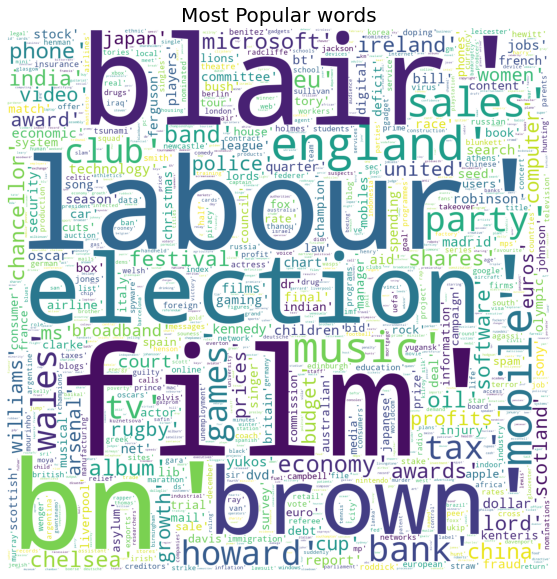

In [120]:
plt.rcParams['figure.figsize'] = (10, 10) #wordcloud
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 1000).generate(str(keywords))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular words',fontsize = 20)
plt.show() 

# Chi Squared Test

In [123]:
dat['category_id'] = dat['category'].factorize()[0] #convert category name to numerical
labels = dat.category_id

category_to_id = {'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4}
id_to_category = { 0: 'business', 1: 'tech', 2:'sport', 3:'entertainment', 4:'politics'}

In [124]:
N = 5  # We are going to look for top 5 categories

#For each category, find words that are highly corelated to it
for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(text_tfidf, labels == category_id)                   # Do chi2 analyses of all items in this category
    indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names = np.array(count_vect.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
    print("# '{}':".format(Category))
    print("  . Most correlated keywords:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 5 unigrams with highest Chi squared stat

# 'business':
  . Most correlated keywords:
       . oil
       . shares
       . bank
       . growth
       . bn
# 'entertainment':
  . Most correlated keywords:
       . awards
       . album
       . festival
       . band
       . film
# 'politics':
  . Most correlated keywords:
       . brown
       . party
       . election
       . blair
       . labour
# 'sport':
  . Most correlated keywords:
       . coach
       . england
       . injury
       . match
       . cup
# 'tech':
  . Most correlated keywords:
       . computer
       . technology
       . software
       . users
       . mobile


### 2.2 Association Rules Mining on keywords

In [125]:
column = [] #convert to dataframe
for x in range(topn):
    column.append(x)

keywordsDataFrame = pd.DataFrame(keywords[0:],columns=column)
keywordsDataFrame

,0,1,2,3,4
0,tv,definition,watch,satellite,content
1,worldcom,ebbers,accounting,fraud,defence
2,farrell,leicester,tigers,rugby,league
3,league,west,cup,united,drawn
4,ocean,sequel,twelve,starring,box
...,...,...,...,...,...
2220,sales,retail,stores,car,rose
2221,kilroy,asylum,silk,veritas,britain
2222,glasgow,concert,gig,tickets,june
2223,prisoners,arms,argument,incentives,word


In [126]:
keywordsTotal=pd.Series([]) #convert to series
for col in keywordsDataFrame:
    keywordsTotal = keywordsTotal.append(keywordsDataFrame[col].dropna())

keywordsTotal

<ipython-input-126-ac1da70a6373>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  keywordsTotal=pd.Series([])


0             tv
1       worldcom
2        farrell
3         league
4          ocean
          ...   
2220        rose
2221     britain
2222        june
2223        word
2224      graeme
Length: 11125, dtype: object

In [127]:
y = keywordsTotal.value_counts().head(5000).to_frame()
y.index

Index(['film', 'labour', 'blair', 'bn', 'brown', 'election', 'mobile',
       'england', 'sales', 'music',
       ...
       'philippe', 'soon', 'owner', 'surgery', 'happy', 'husband', 'drew',
       'pushed', 'stem', 'targeted'],
      dtype='object', length=3067)

In [128]:
y = keywordsTotal.value_counts().head(2000).to_frame()
y.index #reduce feature names

Index(['film', 'labour', 'blair', 'bn', 'brown', 'election', 'mobile',
       'england', 'sales', 'music',
       ...
       'chartered', 'accept', 'hero', 'silicon', 'bennett', 'official',
       'comic', 'commit', 'democracy', 'mary'],
      dtype='object', length=2000)

In [129]:
keywordsArray = np.array(keywordsDataFrame)
keywordsArray #convert to array

array([['tv', 'definition', 'watch', 'satellite', 'content'],
       ['worldcom', 'ebbers', 'accounting', 'fraud', 'defence'],
       ['farrell', 'leicester', 'tigers', 'rugby', 'league'],
       ...,
       ['glasgow', 'concert', 'gig', 'tickets', 'june'],
       ['prisoners', 'arms', 'argument', 'incentives', 'word'],
       ['souness', 'goal', 'uefa', 'cup', 'graeme']], dtype=object)

In [130]:
#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data_encoded = te.fit_transform(keywordsArray)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)

# getting the shape of the data
data_encoded.shape


(2225, 3067)

In [131]:
# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data_encoded = data_encoded.loc[:, y.index]

# checking the shape
data_encoded.shape

(2225, 2000)

In [132]:
data_encoded #view matrix

,film,labour,blair,bn,brown,election,mobile,england,sales,music,...,chartered,accept,hero,silicon,bennett,official,comic,commit,democracy,mary
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [133]:
frequent_itemsets=apriori(data_encoded, min_support = 0.001, use_colnames = True) #generate itemsets

In [134]:
frequent_itemsets

,support,itemsets
0,0.039101,(film)
1,0.026517,(labour)
2,0.025618,(blair)
3,0.025618,(bn)
4,0.022921,(brown)
...,...,...
2295,0.001348,"(unions, choice, pension, prescott)"
2296,0.001348,"(browser, explorer, ie, firefox)"
2297,0.001348,"(silk, party, veritas, kilroy, ukip)"
2298,0.001348,"(ie, firefox, browser, explorer, microsoft)"


In [135]:
frequent_itemsets[['support']].describe()

,support
count,2300.000000
mean,0.002434
std,0.002255
min,0.001348
25%,0.001348
50%,0.001798
75%,0.002697
max,0.039101


In [136]:
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3) #generate association rules based on confidence
rules_c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(festival),(film),0.010337,0.039101,0.005393,0.521739,13.343328,0.004989,2.009152
1,(award),(film),0.008989,0.039101,0.003596,0.400000,10.229885,0.003244,1.601498
2,(oscar),(film),0.007191,0.039101,0.003146,0.437500,11.188937,0.002865,1.708265
3,(films),(film),0.006742,0.039101,0.002247,0.333333,8.524904,0.001984,1.441348
4,(box),(film),0.005843,0.039101,0.002247,0.384615,9.836428,0.002019,1.561461
...,...,...,...,...,...,...,...,...,...
2300,"(choice, prescott)","(workers, unions, pension)",0.001348,0.002247,0.001348,1.000000,445.000000,0.001345,inf
2301,(pension),"(workers, unions, choice, prescott)",0.004045,0.001348,0.001348,0.333333,247.222222,0.001343,1.497978
2302,(unions),"(workers, choice, pension, prescott)",0.003596,0.001348,0.001348,0.375000,278.125000,0.001343,1.597843
2303,(prescott),"(workers, unions, choice, pension)",0.003146,0.001798,0.001348,0.428571,238.392857,0.001343,1.746854


In [137]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1152,"(fightstar, band)",(busted),0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1057,"(party, veritas)",(ukip),0.001798,0.005393,0.001798,1.0,185.416667,0.001788,inf
1670,"(choice, pension)",(unions),0.001798,0.003596,0.001798,1.0,278.125000,0.001791,inf
1976,"(browser, firefox)","(microsoft, ie)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1064,"(party, kilroy)",(silk),0.002247,0.003596,0.002247,1.0,278.125000,0.002239,inf
1975,"(browser, ie)","(microsoft, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1974,"(browser, microsoft)","(ie, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1062,"(silk, party)",(kilroy),0.002247,0.004045,0.002247,1.0,247.222222,0.002238,inf
1973,"(microsoft, ie, firefox)",(browser),0.001348,0.002247,0.001348,1.0,445.000000,0.001345,inf
1972,"(browser, ie, firefox)",(microsoft),0.001348,0.011685,0.001348,1.0,85.576923,0.001333,inf


<AxesSubplot:>

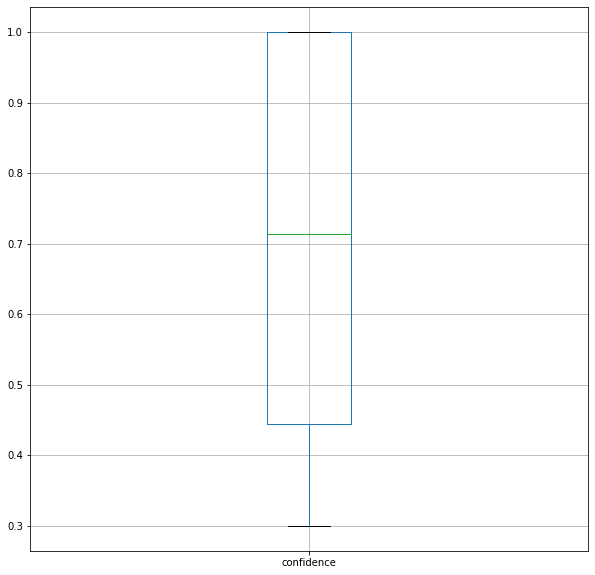

In [138]:
rules_c[['confidence']].boxplot() #boxplot of confidence metric

In [139]:
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=1) #generate association rules based on lift
rules_l

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(film),(awards),0.039101,0.010787,0.002697,0.068966,6.393678,0.002275,1.062489
1,(awards),(film),0.010787,0.039101,0.002697,0.250000,6.393678,0.002275,1.281199
2,(film),(festival),0.039101,0.010337,0.005393,0.137931,13.343328,0.004989,1.148009
3,(festival),(film),0.010337,0.039101,0.005393,0.521739,13.343328,0.004989,2.009152
4,(film),(award),0.039101,0.008989,0.003596,0.091954,10.229885,0.003244,1.091367
...,...,...,...,...,...,...,...,...,...
3229,(pension),"(workers, unions, choice, prescott)",0.004045,0.001348,0.001348,0.333333,247.222222,0.001343,1.497978
3230,(unions),"(workers, choice, pension, prescott)",0.003596,0.001348,0.001348,0.375000,278.125000,0.001343,1.597843
3231,(workers),"(unions, choice, pension, prescott)",0.004944,0.001348,0.001348,0.272727,202.272727,0.001342,1.373146
3232,(prescott),"(workers, unions, choice, pension)",0.003146,0.001798,0.001348,0.428571,238.392857,0.001343,1.746854


In [140]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2899,"(microsoft, ie)","(explorer, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2816,"(busted, simpson)","(fightstar, band)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2897,"(explorer, ie)","(microsoft, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2893,"(explorer, microsoft, firefox)",(ie),0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2892,"(explorer, microsoft, ie)",(firefox),0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2891,(firefox),"(browser, microsoft, ie)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2890,(ie),"(browser, microsoft, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2887,"(ie, firefox)","(browser, microsoft)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2886,"(microsoft, firefox)","(browser, ie)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2885,"(microsoft, ie)","(browser, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf


<AxesSubplot:>

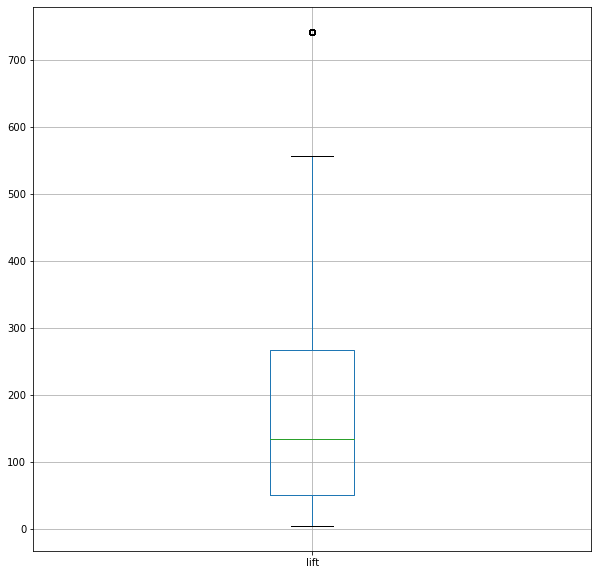

In [141]:
rules_l[['lift']].boxplot() #boxplot based on the lift

In [142]:
# Option A
rules_c[ (rules_c['lift'] >= 700) & #filter association rules using confidence metric
       (rules_c['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1152,"(fightstar, band)",(busted),0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1976,"(browser, firefox)","(microsoft, ie)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1975,"(browser, ie)","(microsoft, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1974,"(browser, microsoft)","(ie, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1971,"(browser, microsoft, firefox)",(ie),0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
...,...,...,...,...,...,...,...,...,...
2134,"(clay, davis)","(moya, roddick)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2132,"(moya, clay)","(roddick, davis)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2131,"(roddick, davis)","(moya, clay)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
1304,"(airline, ms)",(simonetti),0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf


In [143]:
# Option B
rules_l[ (rules_l['lift'] >= 700) & #filter association rules using lift metric
       (rules_l['confidence'] >= 0.95) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2899,"(microsoft, ie)","(explorer, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2816,"(busted, simpson)","(fightstar, band)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2897,"(explorer, ie)","(microsoft, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2893,"(explorer, microsoft, firefox)",(ie),0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
2892,"(explorer, microsoft, ie)",(firefox),0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
...,...,...,...,...,...,...,...,...,...
3135,"(browser, ie)","(explorer, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
3136,"(browser, firefox)","(explorer, ie)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
3137,"(explorer, ie)","(browser, firefox)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf
3138,"(explorer, firefox)","(browser, ie)",0.001348,0.001348,0.001348,1.0,741.666667,0.001346,inf


## 3. Classification Modeling

### 3.1 Sample the data

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestRegressor,AdaBoostRegressor, VotingRegressor

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree 
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")  #used to ignore all warnings

In [145]:
from sklearn import preprocessing
X = text_tfidf.toarray()
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(dat['category'])

In [146]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%) 
# Set the random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

### 3.2 Build the Model(s)

In [59]:
decision_tree = DecisionTreeClassifier(random_state = 6)
decision_tree.fit(X_train, y_train)

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [1. 1. 1. 1. 1.]
test_score:  [0.87191011 0.87191011 0.85842697 0.83820225 0.84269663]
cross val training accuracy is: 1.0
cross val testing accuracy is: 0.856629213483146


In [61]:
lg = LogisticRegression(random_state = 6)
lg.fit(X_train,y_train)

results  = cross_validate(lg, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.99606742 0.99550562 0.99606742 0.99606742 0.99494382]
test_score:  [0.97752809 0.97977528 0.98426966 0.9752809  0.97752809]
cross val training accuracy is: 0.9957303370786518
cross val testing accuracy is: 0.978876404494382


In [62]:
rf = RandomForestClassifier(random_state = 6)
rf.fit(X_train,y_train)

results  = cross_validate(rf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [1. 1. 1. 1. 1.]
test_score:  [0.96629213 0.96853933 0.96404494 0.95280899 0.96179775]
cross val training accuracy is: 1.0
cross val testing accuracy is: 0.9626966292134831


In [63]:
#Creating the Multinomial Naive Bayes Classifier Model (CLF) with default parameters
clf = MultinomialNB()
clf.fit(X_train,y_train)

#K-FOLD cross validation to get more accurate & stable results
results  = cross_validate(clf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.98820225 0.98988764 0.98932584 0.98876404 0.98651685]
test_score:  [0.97303371 0.97752809 0.97977528 0.96179775 0.9752809 ]
cross val training accuracy is: 0.9885393258426965
cross val testing accuracy is: 0.9734831460674156


In [64]:
mlp = MLPClassifier(random_state =6)
mlp.fit(X_train,y_train)

results = cross_validate(mlp, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [1. 1. 1. 1. 1.]
test_score:  [0.98651685 0.98426966 0.98426966 0.97977528 0.97977528]
cross val training accuracy is: 1.0
cross val testing accuracy is: 0.9829213483146069


In [58]:
svclassifier = SVC(random_state = 6)
svclassifier.fit(X_train,y_train)

results  = cross_validate(svclassifier, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.9994382 0.9994382 0.9994382 1.        0.9994382]
test_score:  [0.98202247 0.97752809 0.98426966 0.97977528 0.98426966]
cross val training accuracy is: 0.9995505617977528
cross val testing accuracy is: 0.9815730337078652


### 3.3 Evaluate and Improve the Model(s)

# Logistic Regression

In [67]:
lg = LogisticRegression(random_state = 6, multi_class = 'auto')

param_grid = { "C" : [0.5,1,10,100],
              "solver": ["newton-cg","lbfgs","liblinear","sag","saga"]}

gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy', cv=5)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.9829213483146069
{'C': 100, 'solver': 'newton-cg'}


In [69]:
lg = LogisticRegression(random_state = 6, n_jobs=-1, solver = "newton-cg")

param_grid = { "C" : [75,100,150,200,400]}

gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy', cv=5)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.9829213483146069
{'C': 100}


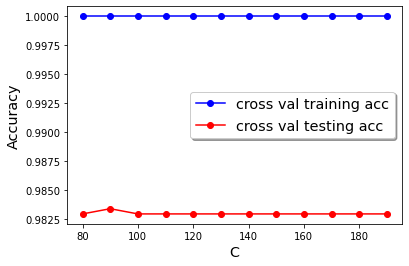

In [70]:
Cvalue = range(80,200,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in Cvalue:
    # Create logistic regression Model
    lg = LogisticRegression(random_state = 6, n_jobs=-1, solver = "newton-cg", C = d)
    lg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(lg.predict(X_train), y_train))
    test_acc.append(accuracy_score(lg.predict(X_test), y_test))
    
    results  = cross_validate(lg, X, y.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

plt.plot(Cvalue, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(Cvalue, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('C', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [71]:
lg = LogisticRegression(random_state = 6, n_jobs = -1, solver = "newton-cg", C = 90)
lg.fit(X_train,y_train)
results  = cross_validate(lg, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [1. 1. 1. 1. 1.]
test_score:  [0.98202247 0.97977528 0.98876404 0.98426966 0.98202247]
cross val training accuracy is: 1.0
cross val testing accuracy is: 0.983370786516854


# Random Forest

In [73]:
rf = RandomForestClassifier(random_state = 6, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
              "n_estimators": [10,50,100],
              "max_depth": [5, 10, 15], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split": [2, 5 ,10]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.9492134831460675
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [75]:
rf = RandomForestClassifier(random_state = 6, n_jobs=-1, criterion = "gini", min_samples_split = 10)

param_grid = {"n_estimators": [100,200,400],
              "max_depth": [15,20,25], 
              "min_samples_leaf" : [0.5,1,2,3]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.9617977528089888
{'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 200}


In [76]:
rf = RandomForestClassifier(random_state = 6, n_jobs=-1, criterion = "gini", min_samples_split = 10, n_estimators = 200, min_samples_leaf = 1)

param_grid = {"max_depth": [25,30,35]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.9617977528089888
{'max_depth': 25}


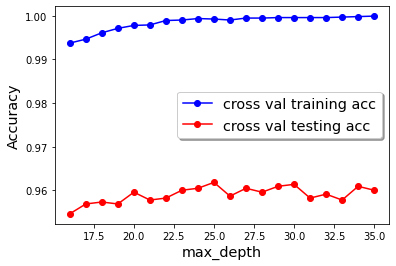

In [78]:
depth_range = range(16,36)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion = 'gini', max_depth = d, min_samples_leaf = 1, min_samples_split = 10,
                                    n_estimators=200, random_state = 6, n_jobs = -1)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(X_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X, y.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

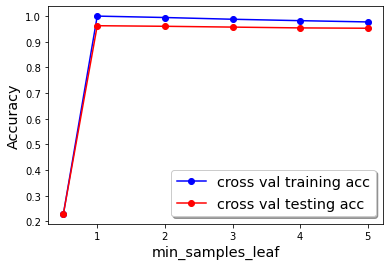

In [79]:
leaf = [0.5,1,2,3,4,5]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in leaf:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf = d, min_samples_split = 10,
                                    n_estimators=200, random_state = 6, n_jobs = -1)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(X_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X, y.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

plt.plot(leaf, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(leaf, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

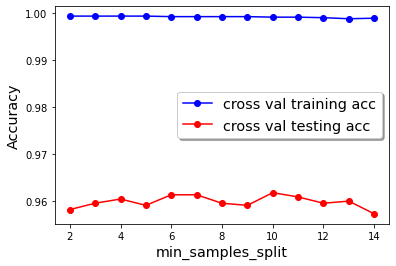

In [80]:
split = range(2,15)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in split:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf = 1, min_samples_split = d,
                                    n_estimators=200, random_state = 6, n_jobs = -1)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(X_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X, y.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

plt.plot(split, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(split, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('min_samples_split', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

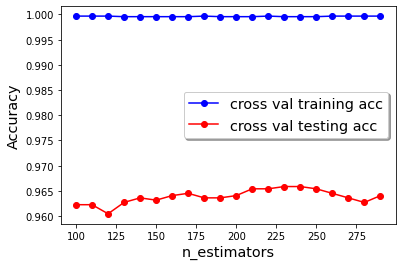

In [82]:
estimators = range(100,300,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in estimators:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion = 'gini', max_depth = 34, min_samples_leaf = 1, min_samples_split = 10,
                                    n_estimators=d, random_state = 6, n_jobs = -1)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(X_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X, y.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

plt.plot(estimators, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(estimators, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [81]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf = 1, min_samples_split = 10,
                                    n_estimators = 240, random_state = 6, n_jobs = -1)
rf.fit(X_train,y_train)
results  = cross_validate(rf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.99831461 0.9994382  0.9988764  0.9994382  1.        ]
test_score:  [0.95955056 0.97303371 0.97078652 0.94382022 0.95505618]
cross val training accuracy is: 0.9992134831460675
cross val testing accuracy is: 0.9604494382022472


# Multinomial Naive Bayes

In [61]:
clf = MultinomialNB()

param_grid = {"alpha": [0.5,1,2,4,8],
              "fit_prior": [True, False]}

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.9752808988764045
{'alpha': 0.5, 'fit_prior': False}


In [62]:
clf = MultinomialNB()

param_grid = {"alpha": [0.01,0.05,0.08,0.1,0.5,0,8]}

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.9793258426966294
{'alpha': 0.05}


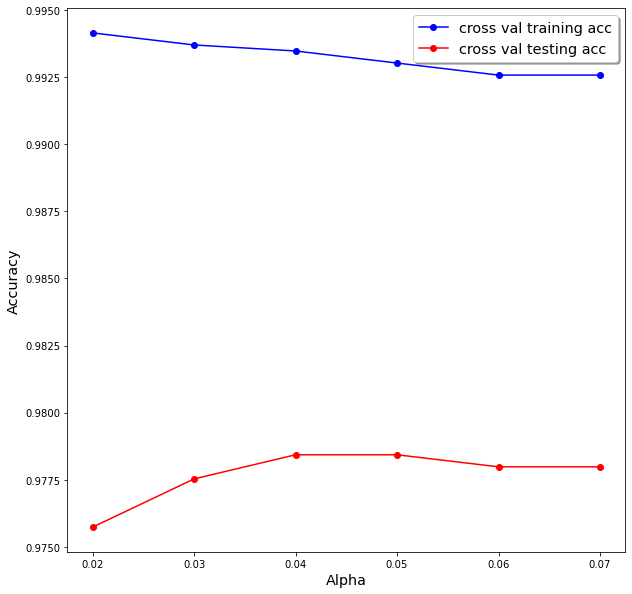

In [147]:
alpha = [0.02,0.03,0.04,0.05,0.06,0.07]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in alpha:
    # Create MultinomialNB Model
    clf = MultinomialNB(fit_prior = False, alpha = d)
    clf.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(clf.predict(X_train), y_train))
    test_acc.append(accuracy_score(clf.predict(X_test), y_test))
    
    results  = cross_validate(clf, X, y.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

plt.plot(alpha, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(alpha, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('Alpha', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [148]:
clf = MultinomialNB(fit_prior = False, alpha = 0.05)
clf.fit(X_train,y_train)
results  = cross_validate(clf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.99269663 0.99269663 0.99438202 0.99325843 0.99213483]
test_score:  [0.97752809 0.98426966 0.98426966 0.96853933 0.97752809]
cross val training accuracy is: 0.9930337078651685
cross val testing accuracy is: 0.9784269662921348


# Stratified Sampling

In [149]:
minimumDoc = min(dat.category.value_counts()) #minimum amount of documents
tempList = [] #temporary list to store the stratified lists of each category (those that are > minimum doc)
category = []

#a loop to go obtain all the unique categories from the dataset
for i in dat['category']:
    if i not in category:
        category.append(i)

#a loop to go through all the categories and perform stratified sampling.
for i in category:
    if (len(dat[dat['category']==i])) > minimumDoc:
        temp = dat[dat['category']==i]
        temp_sampled = temp.sample(n=minimumDoc, random_state=2).copy()
        tempList.append(temp_sampled)
    else: #if the number of documents in the specific category matches the minimum docs, stratified sampling is not used.
        temp = dat[dat['category']==i]
        tempList.append(temp)
        
stratifiedData=pd.concat(tempList,axis=0)
stratifiedData.reset_index(inplace=True)
stratifiedData.category.value_counts()

politics         386
entertainment    386
tech             386
business         386
sport            386
Name: category, dtype: int64

In [150]:
text_all = stratifiedData['text'].apply(lambda x:pre_process(x))

In [151]:
count_vect = CountVectorizer(max_df=0.15, stop_words=stopwords, max_features=5000)
text_counts = count_vect.fit_transform(text_all.tolist())

In [152]:
# Generate TF-IDF matrix
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)

In [153]:
X = text_tfidf.toarray()
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(stratifiedData['category'])

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Final Models

In [155]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf = 1, min_samples_split = 10,
                                    n_estimators = 240, random_state = 6, n_jobs = -1)
rf.fit(X_train,y_train)
results  = cross_validate(rf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [1.         0.99935233 1.         1.         0.99935233]
test_score:  [0.95595855 0.95336788 0.96891192 0.9611399  0.96891192]
cross val training accuracy is: 0.9997409326424871
cross val testing accuracy is: 0.9616580310880829


In [158]:
clf = MultinomialNB(fit_prior = False, alpha = 0.05)
clf.fit(X_train,y_train)
results  = cross_validate(clf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.99352332 0.99611399 0.99158031 0.99287565 0.99352332]
test_score:  [0.96891192 0.97668394 0.97668394 0.97668394 0.98704663]
cross val training accuracy is: 0.9935233160621761
cross val testing accuracy is: 0.97720207253886


In [159]:
lg = LogisticRegression(random_state = 6, n_jobs = -1, solver = "newton-cg", C = 90)
lg.fit(X_train,y_train)
results  = cross_validate(lg, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [1. 1. 1. 1. 1.]
test_score:  [0.98704663 0.97150259 0.97927461 0.97927461 0.98186528]
cross val training accuracy is: 1.0
cross val testing accuracy is: 0.9797927461139896
